**Análise de Dados de anúncios de imóveis de São Paulo**
==============

![Teste](https://cdn.pixabay.com/photo/2016/02/11/23/03/sao-paulo-1194935_960_720.jpg)

Imagem de <a href="https://pixabay.com/pt/users/joelfotos-767874/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1194935">Joel santana Joelfotos</a> por <a href="https://pixabay.com/pt/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1194935">Pixabay</a>

# **Imersão Dados 04 - Alura**

**Autor:** *Leandro H. S. Yorinori*

Sumário



# 01. Introdução

## 01.01. A inspiração do projeto

Este projeto é inspirado na Imersão Dados 04 da [Alura](https://www.alura.com.br/), que ocorreu entre os dias 23 e 27 de maio de 2022. Durante a imersão foram disponibilizadas 05 aulas gratuitas com o intuito de dar os primeiros passos ou se aprofundar no universo da Ciência de Dados. As aulas trouxeram assuntos relevantes tanto para quem estava iniciando na área ou mesmo para pessoas com experiência em Ciência de Dados. Os temas abordados nas aulas foram os seguintes.

- Aula 01: Seu primeiro Colab com Python e Pandas;
<br><br>
- Aula 02: Tratamento de dados e primeiros gráficos;
<br><br>
- Aula 03: Gráficos, time series e análise exploratória;
<br><br>
- Aula 04: Missão impossível: Cruzando bases de dados;
<br><br>
- Aula 05: Machine Learning

Ao final de cada aula foram propostos desafios para buscar um melhor entendimento sobre os conhecimentos passados em aula e para procurar pistas sobre os próximos passos a serem dados durante a análise.

O tema abordado na imersão Dados 4 da [Alura](https://www.alura.com.br/) estava relacionado ao Mercado Imobiliário. A principal base de dados fornecida durante a imersão está relacionada com dados de anúncios de imóveis da cidade de São Paulo.

## 01.02. O Problema a ser resolvido 

O objetivo deste projeto é criar um **modelo de regressão** para **predição** do Valor de anúncio de um imóvel baseado em algumas de suas características. Este modelo será construído utilizando técnicas de **Machine Learning** sobre uma Base de Dados construída através de diversos procedimentos de limpeza e tratamento de dados. Para uma análise mais aprofundada, diferentes bases de dados foram relacionadas para aumentar a complexidade do modelo.  

# 02. Análise Exploratória dos Dados

Segundo a [Escola de Dados](https://escoladedados.org/), "o objetivo da Análise Exploratória de Dados (AED) é utilizar síntese estatística e técnicas de visualização para entender melhor os dados e identificar insights sobre tendências e a qualidade dos dados, bem como para formular hipóteses e fazer suposições nas análises. Análise exploratória de dados NÃO SE TRATA de elaborar visualizações sofisticadas ou mesmo esteticamente agradáveis. O objetivo é fazer testes e encontrar respostas com os dados. [[1]](https://escoladedados.org/tutoriais/analise-exploratoria-de-dados/)".

## 02.01. Bibliotecas utilizadas

### Principais bibliotecas utilizadas

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Instalação e importação de bibliotecas menos usuais

In [215]:
#!pip install shapely
#!pip install geopandas

from shapely.geometry import Point
import geopandas as gpd

Configurando algumas opções das bibliotecas importadas

In [216]:
# 2 casas decimais de precisão
pd.set_option("display.precision", 2)

# formatação expandida com 2 casas decimais de precisão
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# configuração do seaborn
sns.set()

# Suprimir o SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

## 02.02. Leitura dos dados 

Todas as bases de dados utilizadas neste projeto foram disponibilizadas pela própria Alura. Para começar, apenas a Base de dados principal será importada (Dados de anúncio de imóveis de São Paulo), sobre a qual será realizada a Análise Exploratória de Dados. A importação será feita através do link direto dos dados no [GitHub]("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv").

(Há a ressalva de que outras bases de dados serão importadas futuramente para o cruzamento de dados pertinentes. Estas serão importadas ao longo do Notebook, conforme a necessidade.)

In [217]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

# Leitura do arquivo csv
df_raw = pd.read_csv(url)

In [218]:
# Visualização do cabeçalho do DataFrame
df_raw.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## 02.03 Exploração, Tratamento e Limpeza de dados

### Tratamento de dados nulos e de tipagem de dados

Uma primeira investigação que pode ser feita é sobre o tipo dos dados e a quantidade de dados não nulos por coluna do DataFrame. O método `info()` nos fornece isto

In [219]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Nota-se que as colunas Rua e Bairro apresentam dados nulos. Além disto, a coluna 'Valor' apresenta o tipo objeto. O esperado seria que o tipo fosse de espécie numérica. Isto indica que provavelmente será necessário aplicar algum tipo de tratamento nesta coluna 'Valor' para transformá-la em um tipo numérico.

Ao buscar um elemento da coluna 'Valor' vemos que ele aparenta ser uma string.

In [220]:
df_raw["Valor"][0]

'R$ 7.000.000'

Podemos confirmar sua tipagem utilizando o comando `type`

In [221]:
type(df_raw["Valor"][0])

str

E como esperado, a variável é do tipo string. 

Podemos utilizar o método `split` para separar o R$ do 'número' e o argumento `expand=True` para criar um data frame das com as divisões realizadas pelo método `split`.

In [222]:
df_raw["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Deve-se investigar cada uma das colunas geradas.

In [223]:
df_raw["Valor"].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [224]:
df_raw["Valor"].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [225]:
df_raw["Valor"].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

- A primeira coluna apresenta somente o símbolo da moeda;
- A segunda coluna parece conter apenas as strings de 'números' que devem ser convertidas;
- Aparentemente, os dados da terceira coluna que apresentam as qualidades '/Mês', '/Ano' e '/Dia' estão relacionados com imóveis disponíveis para serem alugados. Por hora estes imóveis não nos interessam e podem ser removidos da base de dados.

Neste momento é conveniente criar um DataFrame que contemple a coluna valor expandida.

In [226]:
# Faz uma cópia do DataFrame original
df_expandido = df_raw

# Cria três novas colunas que armazenam o split da coluna Valor
df_expandido[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = df_expandido["Valor"].str.split(expand=True)
df_expandido.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None


In [227]:
# Filtra o DataFrame, removendo os dados de aluguéis (dados que tem tipo anúncio = '/Mês', '/Ano' e '/Dia')
dados_vendas = df_expandido[df_expandido["Tipo_anuncio"].isnull()]
dados_vendas.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None


In [228]:
# Sobrescrevendo a coluna Valor com os valores tratados e transformados para float 
# Remoção dos caracteres de pontos dos dados da coluna Valor_anuncio e conversão do tipo para float 
dados_vendas["Valor"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

Novamente, pode-se utilizar o método `info()` para extrair informações do Dataset atual.

In [229]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   float64
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   object 
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


Note que a coluna Tipo_anuncio só contém valores vazios. Neste momento é conveniente a remoção desta coluna e também das colunas associadas à Valor que ainda são do tipo string. 

In [230]:
# Removendo colunas que já foram tratadas
dados_vendas.drop(columns=['Moeda', 'Valor_anuncio', 'Tipo_anuncio'], inplace=True)

dados_vendas.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00


Está completa a conversão do tipo da coluna Valor para tipo float.

## Visualização dos Dados numéricos 

O método `describe` retorna estatísticas relevantes sobre os dados numéricos do dataframe.

In [231]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Uma forma interessante de visualização de várias estatísticas presentes no método `describe` é realizada através da plotagem de um boxplot. A seguir são plotados os gráficos para as variáveis Metragem, Quartos e Valor.

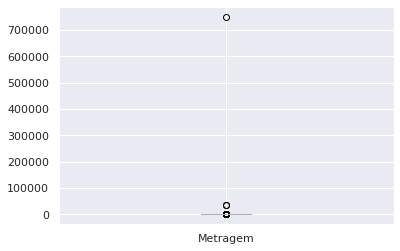

In [232]:
dados_vendas[['Metragem']].boxplot()

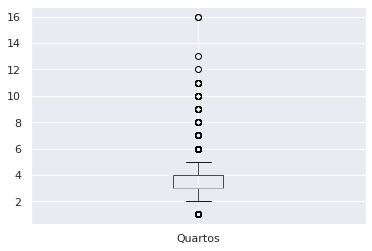

In [233]:
dados_vendas[['Quartos']].boxplot()

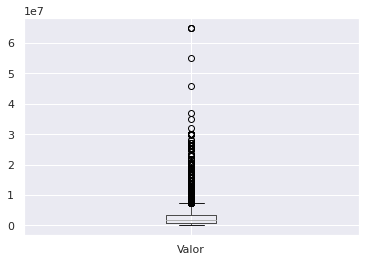

In [234]:
dados_vendas[['Valor']].boxplot()

Ao observar o Boxplot de destas variáveis, fica claro que existem outliers que devem ser removidos. Os outliers são dados que se diferenciam drasticamente de todos os outros no conjunto de dados e que podem comprometer a análise e, portanto devem ser removidos.

## Remoção de Outliers: Método "Interquartile Range (IQR)" 

Existem diversas técnicas de remoção de Outliers. Neste projeto é adotado o método *Interquartile Range*. Caso tenha interesse em saber mais sobre Outliers, dê uma olhada neste [ótimo material [2]](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755).

In [235]:
# Seleção das colunas alvo
cols = ["Valor"] 

# Cálculo dos percentis e IQR
Q1 = dados_vendas[cols].quantile(0.25)
Q3 = dados_vendas[cols].quantile(0.75)
IQR = Q3 - Q1

# Remoção dos Outliers através do método IQR
dados_vendas_IQR = dados_vendas[~((dados_vendas[cols] < (Q1 - 1.5 * IQR)) |(dados_vendas[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

A remoção de outliers se baseia na coluna 'Valor' pois temos interesse de torná-la a variável alvo durante a construção do modelo de Machine Learning. Mas isto não impede que seja feito tratamento de Outliers baseado em outras variáveis.

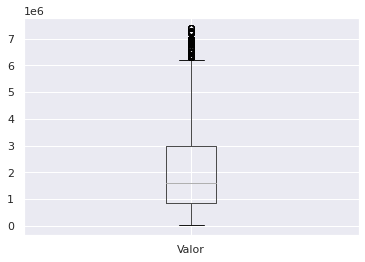

In [236]:
# Boxplot após remoção dos Outliers
dados_vendas_IQR[['Valor']].boxplot()

## Outras formas de visualizações dos dados

Existem diversas formas de explorar os dados. A visualização correta dos dados nos ajuda a extrair as informações pertinentes.

Dados numéricos com magnitude muito grande às vezes podem atrapalhar a análise e muitas vezes é conveniente fazer a normalização ou parametrização destes dados. A seguir os dados de valores sofrerão uma parametrização em que os valores serão divididos por 1 milhão.

In [237]:
# Criando nova coluna com valor parametrizado da coluna Valor. Divisão por 1 milhão
dados_vendas_IQR["Valor_por_M"] = dados_vendas_IQR["Valor"] / 1000000

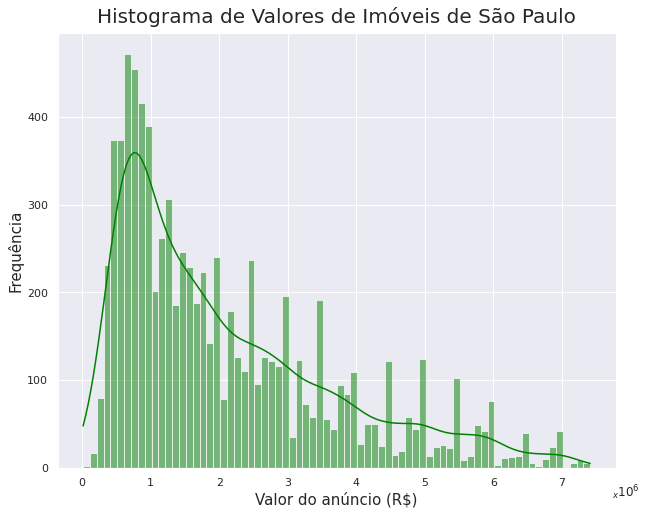

In [238]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas_IQR,
                  x = "Valor_por_M",
                  binwidth = 0.1,
                  kde = True,
                  color = 'green')
ax.set_title(r"Histograma de Valores de Imóveis de São Paulo", fontsize=20, pad=10)
ax.set_ylabel(r'Frequência', fontsize=15)
ax.set_xlabel(r"Valor do anúncio (R\$)", fontsize=15)

ax.annotate(r'$_{x}10^6$', xy=(0.92, 0.05), xycoords='figure fraction')

plt.show()

O Histograma de Valores de imóveis de São Paulo é enviesado à direita, indicando que os valores altos ocorrem com baixa frequência. Este tipo de histograma geralmente representa fenômenos identificados na economia [[3]](https://pt.wikipedia.org/wiki/Histograma), como é o caso dos Valores de imóveis de São Paulo aqui estudados. 

### Análise do preço por metro quadrado dos imóveis de São Paulo

Podem existir diversas abordagens para o cálculo do preço por metro quadrado. Aqui será adotado o cálculo através da divisão do Valor do imóvel por sua Metragem.

$$ Preço/m^2 = \frac{Valor}{Metragem}$$

A seguir é criado uma coluna 'preco_m2' para armazenar os valores calculados dos preços por metro quadrado para cada item do dataset.

In [239]:
# Criando uma nova coluna com o preço por metro quadrado
dados_vendas_IQR["preco_m2"] = dados_vendas_IQR["Valor"] / dados_vendas_IQR["Metragem"]
dados_vendas_IQR.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68


Pode-se investigar o comportamento dos dados de preço por metro quadrado através de um Boxplot.

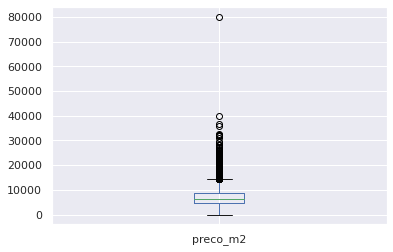

In [240]:
dados_vendas_IQR["preco_m2"].plot.box()

Claramente nota-se um valor anômalo quando os dados de preço por metro quadrado são analisados. Não houve tal clareza quando analisados apenas os dados de Valores. Isto reforça a importância de explorar a base de dados e criar novas variáveis que façam sentido para a análise.

Pode-se remover este dado anômalo pontual. O precedimento para isto é realizado a seguir.

In [241]:
# Armazenando o índice do maior valor de preco_m2
tmp_index = dados_vendas_IQR["preco_m2"].sort_values(ascending=False).index[0]

# Removendo a linha que possui
dados_vendas_IQR.drop(tmp_index, inplace=True)


Também pode-se analisar os dados através de técnicas de agrupamentos. Neste projeto faz sentido, por exemplo, analisar os dados por bairro. E é exatamente isto que será feito a seguir.

In [242]:
# Agrupando os dados por bairro
agrupado = dados_vendas_IQR.groupby("Bairro")
agrupado.mean().head(2)

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2
Bairro,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57


In [243]:
# Selecionando a variável a ser plotada:
#   média de preços por metro quadrado por bairro
var2plot = agrupado.mean()['preco_m2']

Uma forma interessante de visualizar estes dados é através de um gráfico de barra. Porém, como a quantidade de bairros é muito grande, para que o gráfico possa ser legível, deve-se limitar a apresentação dos dados para um número reduzido. A seguir são mostrados os 20 bairros com os maiores médias de preços por metro quadrado de São Paulo.

Text(0.5, 0, 'Bairro')

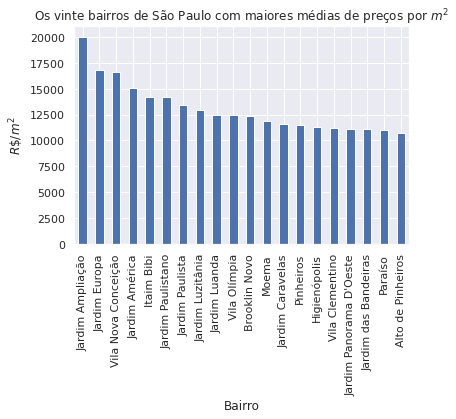

In [244]:
ax = var2plot.sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_title(
    r"Os vinte bairros de São Paulo com maiores médias de preços por $m^2$")
ax.set_ylabel(r"$R\$/m^2$")
ax.set_xlabel(r"Bairro")

O gráfico mostra que o bairro Jardim Ampliação apresenta a maior média de preço por metro quadrado. Além disto, o gráfico contempla diversos bairros nobres de São Paulo (como Jardim Europa, Jardim e Paulista e Moema), como é esperado. 

Também é apresentado o gráfico dos 20 bairros com as menores médias de preços por metro quadrado de São Paulo.

Text(0.5, 0, 'Bairro')

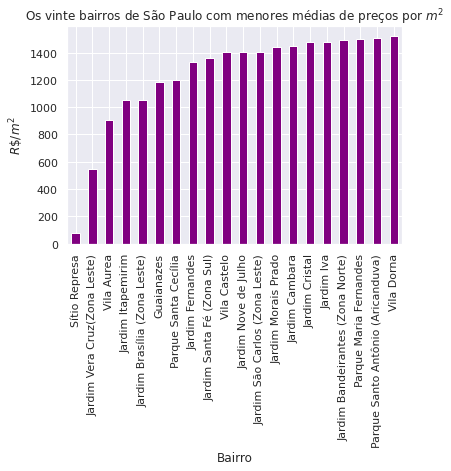

In [245]:
ax = var2plot.sort_values(ascending=True).head(20).plot(kind='bar', color='purple')
ax.set_title(
    r"Os vinte bairros de São Paulo com menores médias de preços por $m^2$")
ax.set_ylabel(r"$R\$/m^2$")         
ax.set_xlabel(r"Bairro") 

Quando apresentados os vinte bairros com menores médias de preços por metro quadrado, nota-se que o Bairro Sitio Represa apresenta um valor muito abaixo em relação aos demais bairros e portanto pode ser um motivo para uma investigação na base de dados.

Pode-se fazer a busca dos imóveis que são do bairro Sítio Represa da seguinte forma.

In [246]:
dados_vendas_IQR.set_index("Bairro").loc["Sítio Represa"]

Rua            Rua Benedito Felizardo
Cidade                      São Paulo
Metragem                        37000
Quartos                             4
Banheiros                           2
Vagas                               4
Valor                      2900000.00
Valor_por_M                      2.90
preco_m2                        78.38
Name: Sítio Represa, dtype: object

Como pode ser observado, a busca retornou apenas um imóvel na região. Analisando os dados nota-se que o imóvel aparenta ser uma fazenda ou chácara devido seu valor alto de Metragem e poucos quartos e banheiros. Por este motivo o preço do metro quadrado está reduzido.

# 02.03. Relacionando outras Bases de Dados

Com o intuito de enriquecer os dados para a construção do modelo, torna-se interessante agregar outros tipos de variáveis que o dataset ainda não contempla. Uma variável interessante é a renda. Esta variável está disponível nas [bases de dados do ibge](https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv).

### Base de dados do IBGE (Renda)

In [248]:
ibge_csv_path = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'

# Leitura do aquivo do ibge
ibge_sp = pd.read_csv(
    ibge_csv_path,
    encoding='ISO-8859-1',
    thousands='.',
    decimal=',',
    sep=';')

# drop de coluna vazia
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head(2)

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


#### [Dicionário de dados do IBGE [4]](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view), página 45, Arquivo Básico.

(É possível colapsar esta seção caso o texto grande incomode)

- Cod_setor : Código do setor censitário
<br/><br/>
- Cod_Grandes Regiões : Código das Grandes Regiões (Regiões Geográficas)
<br/><br/>
- Nome_Grande Região : Nome das Grandes Regiões (Regiões Geográficas)
<br/><br/>
- Cod_UF : Código da Unidade da Federação
<br/><br/>
- Nome_da_UF : Nome da Unidade da Federação
<br/><br/>
- Cod_meso : Código da mesorregião
<br/><br/>
- Nome_da_meso : Nome da mesorregião
<br/><br/>
- Cod_micro : Código da microrregião
<br/><br/>
- Nome_da_micro : Nome da microrregião
<br/><br/>
- Cod_RM : Código da região metropolitana ou RIDE
<br/><br/>
- Nome_da_RM : Nome da região metropolitana ou RIDE
<br/><br/>
- Cod_municipio : Código do município
<br/><br/>
- Nome_municipio : Nome do município
<br/><br/>
- Cod_distrito : Código do distrito
<br/><br/>
- Nome_do_distrito : Nome do distrito
<br/><br/>
- Cod_subdistrito : Código do subdistrito
<br/><br/>
- Nome_do_subdistrito : Nome do subdistrito
<br/><br/>
- Cod_bairro : Código de bairro
<br/><br/>
- Nome_do_bairro : Nome do bairro
<br/><br/>
- Situação_setor : Código de situação do setor
<br/><br/>
    - Situação urbana – códigos: 1, 2 e 3
    <br/><br/>
        - 1- Área urbanizada de cidade ou vila
        <br/><br/>
        - 2- Área não-urbanizada de cidade ou vila
        <br/><br/>
        - 3- Área urbana isolada
        <br/><br/>
    - Situação rural – códigos: 4, 5, 6, 7 e 8
    <br/><br/>
        - 4- Aglomerado rural de extensão urbana
        <br/><br/>
        - 5- Aglomerado rural isolado – povoado
        <br/><br/>
        - 6- Aglomerado rural isolado – núcleo
        <br/><br/>
        - 7- Aglomerado rural isolado - outros aglomerados
        <br/><br/>
        - 8- Zona rural, exclusive aglomerado rural
        <br/><br/>
- V001 : Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
<br/><br/>
- V002 : Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes <br/><br/>
- V003 : Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
<br/><br/>
- V004 : Variância do número de moradores em domicílios particulares permanentes
<br/><br/>
- V005 : Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
<br/><br/>
- V006 : Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes  (com e sem rendimento) <br/><br/>
- V007 : Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
<br/><br/>
- V008 : Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes  (com rendimento)
<br/><br/>
- V009 : Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
<br/><br/>
- V010 : Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
<br/><br/>
- V011 : Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
<br/><br/>
- V012 : Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)
<br/><br/>

#### Continuando a análise

- Os dados do IBGE possuem diversas variáveis de renda

In [249]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

Tem-se o interesse de combinar as duas bases de dados (`dados_vendas_IQR` e `ibge_sp`). Para realizar este tipo de combinação é necessário que ambas as bases de dados tenham uma variável em comum para efetuar o pareamento.

As variáveis que ambos os datasets possuem em comum são *Rua* e *Bairro*. Porém estas variáveis são problemáticas por poderem apresentar diferentes formas de grafia para um mesmo elemento (Por exemplo, o bairro Vila Mariana pode estar abreviado como V. Mariana e neste caso o pareamento não ocorreria). 

Uma variável bastante precisa da base de dados `ibge_sp` é o código do setor censitário `Cod_setor`, porém a base de dados `dados_vendas_IQR` não apresenta esta variável. Apesar desta variável não existir no dataframe, é possível conseguí-la caso outras bases de dados sejam utilizadas para tal.

É possível conseguir o código do setor censitário a partir do endereço. As etapas do procedimento são descritas a seguir:
- A partir do endereço deve-se encontrar as coordenadas geográficas: latitude e longitude;
- Com a latitude e longitude pode-se verificar em qual setor censitário o local está contido (Isto é realizado utilizando dados geoespaciais).
- Por fim, é armazenado o código do setor censitário 

#### E como isto será realizado?

Com o auxílio de mais duas bases de dados:
- Base de dados de endereços de São Paulo: contêm valores das coordenadas geográficas: latitude e longitude
- Base de dados geoespaciais: contêm valores dos códigos e polígonos dos setores censitários.


### Base de dados de endereços

Carregando a base de dados de endereços de São Paulo com a finalidade de obter as coordenadas geográficas: latitude e longitude.

In [250]:
df_enderecos_sp = pd.read_csv("data/enderecos_sp.csv")
df_enderecos_sp.head(2)

/home/yorinori/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627.00,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
1,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34


Preparação dos dados para realizar um `merge`.

In [251]:
df_enderecos_sp["rua2merge"] = df_enderecos_sp["tipo_logr"] + " " + df_enderecos_sp["logr_nome"]
df_enderecos_sp["rua2merge"] = df_enderecos_sp["rua2merge"].str.lower().str.strip()
df_enderecos_sp.head(2)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua2merge
0,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627.00,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
1,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a


Neste momento, o que se quer é preparar os dados da base de dados principal `dados_vendas_IQR` para fazer um `merge` com o `df_enderecos_sp`. Isto é realizado aplicando uma [RegEx [5]](https://www.alura.com.br/conteudo/expressoes-regulares?gclid=CjwKCAjws8yUBhA1EiwAi_tpEYmbYUlexxMoyOTmWZPW7mc6ZbrwsZR4DcrHIG1ShbNGkSW17LGV3BoC0lEQAvD_BwE) sobre a coluna "Rua", como demonstrado a seguir.

In [252]:
dados_vendas_IQR["rua4merging"] = dados_vendas_IQR["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas_IQR["rua4merging"] = dados_vendas_IQR["rua4merging"].str.lower().str.strip()
dados_vendas_IQR.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2,rua4merging
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,rua aurelia perez alvarez


É criado um novo dataframe chamado `dados_geo` que armazena a junção dos dataframes `dados_vendas_IQR` e `df_enderecos_sp`.

In [443]:
dados_geo = pd.merge(left = dados_vendas_IQR,
                     right = df_enderecos_sp[["rua2merge", "cep", "latitude", "longitude"]],
                     how = "left",
                     left_on = "rua4merging",
                     right_on = "rua2merge"
                     ).drop_duplicates(subset=dados_vendas_IQR.columns).query("cep > 0")
dados_geo.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2,rua4merging,rua2merge,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69


### Base de dados para o geopandas (dimensões do polígono)

Os dados censitários são lidos da base de dados geoespaciais utilizando o geopandas.

In [368]:
setor_censo = gpd.read_file('data/35SEE250GC_SIR.shp')
setor_censo.head(2)

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."


Os dados são filtrados para São Paulo

In [370]:
# filtrando os dados para o município de São Paulo
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

# Retorna os itens de setor_censo_cp que contém o ponto de interesse
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.00,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


A próxima célula tem um grande papel no processo de relacionamento dos datasets. O código desta célula tem os seguintes passos:

- Cria os pontos geográficos baseados na latitude e longitude e os armazenam em uma nova coluna do dataframe dados_geo chamada de "Point";
<br><br>
- Verifica se o ponto está contido em um dos polígonos da base de dados `setor_censo_sp`. Caso afirmativo, é retornado o código do setor censitário e este é armazenado em uma nova coluna do dataframe `dados_geo`.
<br><br>

In [396]:
# Armazena na coluna Point os pontos delimitados pela longitude e latitude.
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

# A partir de "Point" é buscado o setor censitário no dataframe setor_censo_sp
dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]

 dados_geo.head(2)

0                    []
5     [355030871000023]
6     [355030830000050]
7                    []
26                   []
39    [355030865000169]
40    [355030859000013]
41    [355030846000047]
42    [355030834000022]
44    [355030893000075]
Name: Point, dtype: object

In [392]:
# Convertendo o tipo da coluna setor_censo para inteiro
dados_geo['setor_censo'] = dados_geo['setor_censo'].dropna().astype(int)

Após a realização desta operação, o dataframe `dados_geo` possui uma coluna com os códigos do setor censitário que podem ser relacionadas com o dataframe `ibge_sp` que também possui uma coluna com os códigos do setor censitário. 

Portanto, é possível completar o objetivo de relacionar os dados da base de dados principal com os dados de renda presentes na base de dados do IBGE. Isto é alcançado através do `merge` (junção) dos dois dataframes.

In [393]:
dados_vendas_censo = pd.merge(left = dados_geo,
                              right =ibge_sp ,
                              how = "left",
                              left_on = "setor_censo",
                              right_on = "Cod_setor")
dados_vendas_censo.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90


# 04. Machine Learning: problema de regressão

## Construção do Baseline

È importante que seja contruído um modelo de baseline para futuras comparações dos modelos. 

In [497]:
dados_vendas_IQR.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2,rua4merging
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,avenida itacira


As variáveis utilizadas para o modelo de baseline são aquelas presentes na base de dados principal `dados_vendas_IQR`.

In [498]:
df_baseline = dados_vendas_IQR[["Valor", "Metragem", "Quartos", "Banheiros", "Vagas"]].dropna()
df_baseline.head(1)

,Valor,Metragem,Quartos,Banheiros,Vagas
0,7000000.00,1000,4,8,6


Atribuindo a matriz de características e o vetor da variável alvo.

In [499]:
y = df_baseline.pop("Valor")
X = df_baseline

Configurando o random state para reprodução dos resultados.

In [500]:
SEED = 42
np.random.seed(SEED)

In [501]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separação do dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Instanciando o modelo de regressão linear
lr = LinearRegression()

In [502]:
# Ajustando o modelo com dados de treino
lr.fit(X_train, y_train)

LinearRegression()

In [503]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics

mean_absolute_error(y_train, lr.predict(X_train))

956750.3499079415

In [504]:
y_previsto = lr.predict(X_test)

# Função métricas :: armazena em um dataframe as principais métricas da análise
def metricas(y_test, y_predicted, label):
    EAM = metrics.mean_absolute_error(y_test, y_predicted).round(2)
    EQM = metrics.mean_squared_error(y_test, y_predicted).round(2)
    REQM = np.sqrt(metrics.mean_squared_error(y_test, y_predicted)).round(2)
    R2 = metrics.r2_score(y_test, y_predicted).round(2)

    resultados = pd.DataFrame([EAM, EQM, REQM, R2], ['EAM', 'EQM', 'REQM', 'R²'], columns = [label])
    return resultados

resultados = metricas(y_test, y_previsto, 'Baseline')
resultados

,Baseline
EAM,956753.38
EQM,1688502931752.25
REQM,1299424.08
R²,0.33


Estes são os valores das métricas obtidos para o Modelo de baseline.

## Modelo mais complexo

Podemos construir um modelo mais complexo ao levar em conta as variáveis obtidas através do relacionamento de diversas bases de dados.

In [505]:
# Selecionando as colunas relevantes para a análise 
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor', 'Valor_por_M', 'preco_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()

dados_vendas_censo.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88


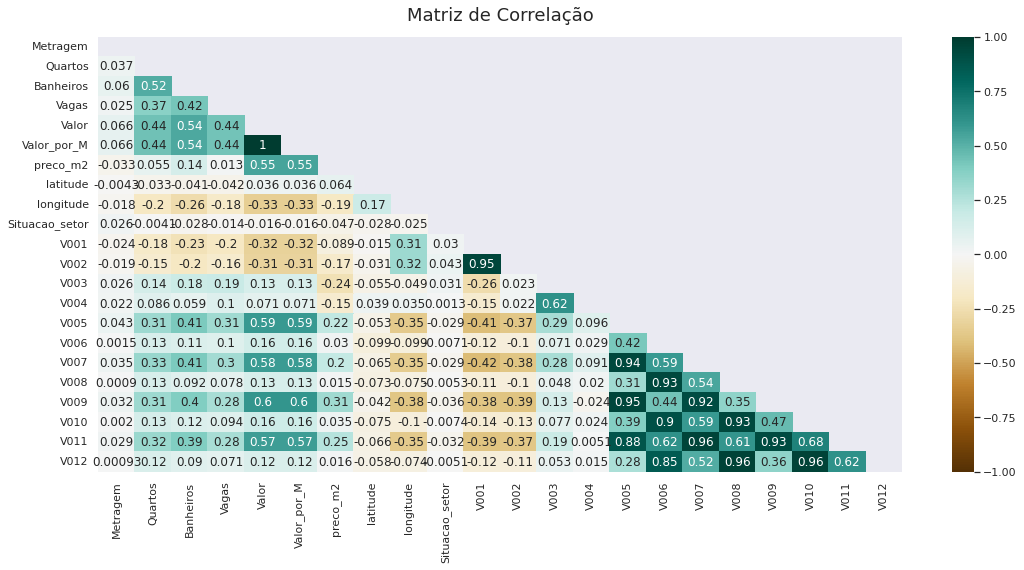

In [506]:
plt.figure(figsize=(18, 8))

# Máscara para omitir a diagonal superior 
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(),
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')
heatmap.set_title('Matriz de Correlação', fontdict={'fontsize':18}, pad=16);

A matriz de correlação nos mostra quais variáveis estão correlacionadas. Podemos ver que diversas variáveis de renda estão altamente correlacionadas.

Segue-se com a construção do modelo mais complexo.

In [507]:
# Selecionando a matriz de features e o target
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','latitude', 'longitude', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]
y = dados_vendas_censo["Valor"]

# Separação dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Ajuste do modelo
lr.fit(X_train, y_train)

LinearRegression()

In [508]:
metricas(y_test, lr.predict(X_test), '+ Complexo')

,+ Complexo
EAM,744854.88
EQM,1164386837731.90
REQM,1079067.58
R²,0.50


In [509]:
resultados = pd.concat([resultados, metricas(y_test, lr.predict(X_test), '+ Complexo')], axis=1)
resultados

,Baseline,+ Complexo
EAM,956753.38,744854.88
EQM,1688502931752.25,1164386837731.90
REQM,1299424.08,1079067.58
R²,0.33,0.50


## Redução de Dimensionalidade

A seguir é aplicada uma técnica de redução de dimensionalidade.

In [510]:
from sklearn.feature_selection import RFECV

SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

lr = LinearRegression()
lr.fit(X_train, y_train)

selecionador_rfecv = RFECV(estimator = lr, cv = 10, step = 1, min_features_to_select=12)
selecionador_rfecv.fit(X_train, y_train)

rfecv_train = selecionador_rfecv.transform(X_train)
rfecv_test = selecionador_rfecv.transform(X_test)

lr.fit(rfecv_train, y_train)

LinearRegression()

In [511]:
metricas(y_test, lr.predict(rfecv_test), 'RFECV')

,V02
EAM,742640.29
EQM,1156501879094.19
REQM,1075407.77
R²,0.50


In [513]:
resultados = pd.concat([resultados, metricas(y_test, lr.predict(rfecv_test), 'RFECV')], axis=1)
resultados

,Baseline,+ Complexo,RFECV
EAM,956753.38,744854.88,742640.29
EQM,1688502931752.25,1164386837731.90,1156501879094.19
REQM,1299424.08,1079067.58,1075407.77
R²,0.33,0.50,0.50


Comparando as métricas dos três modelos analisados podemos ver que os modelos +Complexo e RFECV (Redução de dimensionalidade) são superiores ao modelo de baseline. Como não houve aumento significativo dos erros, há uma preferência para o uso do modelo com aplicação de redução de dimensionalidade, com a finalidade de poupar recursos computacionais. Os valores de $R^2$ são relativamente baixos e isto pode indicar uma natureza não-linear do fenômeno que tentamos modelar.

Text(0, 0.5, 'Valores de referência')

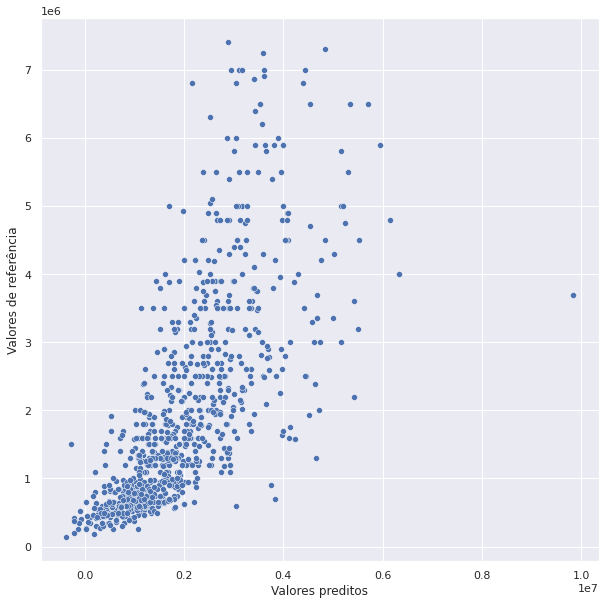

In [512]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x=lr.predict(rfecv_test), y=y_test)
ax.set_xlabel('Valores preditos')
ax.set_ylabel('Valores de referência')

O gráfico nos mostra que a predição têm mais chances de acertar quando os valores dos imóveis são relativamente baixos. O modelo costuma errar quando os valores dos imóveis são mais altos. 

# 05. Conclusões

- O modelo com redução de dimensionalidade parece ser o melhor candidato para efetuar as predições de valor de anúncio de imóveis de São Paulo.
<br><br>
- O modelo apresenta maior eficiência quando os valores dos imóveis são menores e uma pior eficiência quando os valores são maiores. Isto pode estar relacionado com a características de dados econômicos que costumam ter histograma enviesados à direita, indicando dados com alto valores e baixa frequência. 
<br><br>
- Os valores de $R^2$ obtidos pelos modelos são relativamente baixos e isto pode indicar uma natureza não-linear do fenômeno que tentamos modelar.

# Sugestões de melhoras

- Foi utilizado apenas regressão linear nos modelos de Machine Learning. Há a necessidade de investigar modelos mais complexos.
<br><br>
- Pode-se transformar variáveis categóricas para incorporar o modelo, especialmente a variável bairro tem um grande potencial para ajudar no problema.
<br><br>

# 06. Referências Bibliográficas

## Dados

- [Dados de anúncios de imóveis de São Paulo]("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
<br><br>
- [Base de dados do ibge](https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv)
<br><br>

## Documentação das bibliotecas utilizadas

- [Pandas](https://pandas.pydata.org/docs/)
<br><br>
- [Sklearn](https://scikit-learn.org/stable/)
<br><br>
- [Geopandas](https://geopandas.org/en/stable/docs.html)
<br><br>


## Páginas e referências
- Página da Alura: [https://www.alura.com.br/](https://www.alura.com.br/)
<br><br>
- Página da Escola de Dados: [https://escoladedados.org/](https://escoladedados.org/)
<br><br>
[[1]](https://escoladedados.org/tutoriais/analise-exploratoria-de-dados/) O que é Análise Exploratória de Dados
<br><br>
[[2]](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755) Detecting and Treating Outliers in Python
<br><br>
[[3]](https://pt.wikipedia.org/wiki/Histograma) Artigo sobre histograma
<br><br>
[[4]](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view) Dicionário de dados do IBGE, página 45, Arquivo Básico.
<br><br>
[[5]](https://www.alura.com.br/conteudo/expressoes-regulares?gclid=CjwKCAjws8yUBhA1EiwAi_tpEYmbYUlexxMoyOTmWZPW7mc6ZbrwsZR4DcrHIG1ShbNGkSW17LGV3BoC0lEQAvD_BwE) O que é uma Expressão Regular (RegEx)

# 07. Agradecimentos

Agradeço à Alura pela oportunidade de desenvolver meu conhecimento na área de Ciência de Dados. Isto inclui os meus sinceros agradecimentos aos professores Paulo Silveira, Thiago Gonçalves e Vivian Yamassaki.

# 08. Sobre mim